# Heart Attack Analysis and Prediction Dataset

This dataset contains information about people and there chances of having a heart stroke.


 **Dataset Information:**





* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* target : 
    * 0 = less chance of heart attack 
    * 1 = more chance of heart attack
    
    

**Objective:**




* With the dataset provided for heart analysis, we have to analyse the possibilities of heart attack on the basis of various features, and then the prediction from the analysis will tell us that whether an individual is prone to heart attack or not. 
* The detailed analysis can proceed with the exploratory data analysis (EDA). 
* The classification for predication can be done using various machine learning model algorithms, choose the best suited model for heart attack analysis and finally save the model in the pickle (.pkl) file.


**Questions to be answered:**





* Does the age of a person contribute towards heart attack?
* Are different types of chest pain related to each other or the possibility of getting a heart attack?
* Does high blood pressure increase the risk of heart attack?
* Does the choestrol level eventually contribute as a risk factor towards heart attack?



In [ ]:
# Heart Attack Analysis and Prediction Dataset
# Date: April 26, 2021

In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing

import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

#for model building
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics


In [ ]:
#Reading the csv file heart.csv in variable 
df=pd.read_csv('https://raw.githubusercontent.com/shubham404-error/ML-Assignment/main/heart.csv')

In [ ]:
# looking at the first 5 rows of our data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Observation:**
 
 * Seems like all the columns are already in int or float data types.
 * If the columns were not in int or float ( i.e they were categorical variables), we would have had to convert them for model building.
 * Few ways to do so are by using pd.get_dummies, one hot encoding, multi collinearity, label encoder etc.

In [ ]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
print('Number of rows are',df.shape[0], 'and number of columns are ',df.shape[1])

Number of rows are 303 and number of columns are  14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Observation:**

* There are no missing rows in the entire dataset.
* All the columns except oldpeak (float) are of int data type.

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Observation:** There are no missing values.

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
df.duplicated().sum()

1

**Observation:** There is 1 duplicate row. Let's drop it!

In [ ]:
df.drop_duplicates(inplace=True)
print('Number of rows are',df.shape[0], 'and number of columns are ',df.shape[1])

Number of rows are 302 and number of columns are  14


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


**Observation:**

* The average blood pressure of an individual is 130 whereas the maximun value goes upto 200.
* The average heart rate of the group is 152, whereas overall it ranges between 133 to 202
* Age of the group varies from 29 to 77 and the mean age is 55.5

In [ ]:
#This is to look at what all unique values have . Just trying to use python
list_col=['sex','chol','trtbps','cp','thall','exng']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

SEX :[1 0] 
CHOL :[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131] 
TRTBPS :[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 
CP :[3 2 1 0] 
THALL :[1 2 3 0] 
EXNG :[0 1] 


In [ ]:
X = df.drop('output', axis = 1)
y = df['output']

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
columns_to_scale = df.iloc[:,[0,3,4,7,9,]]
columns_to_scale

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
297,57,140,241,123,0.2
298,45,110,264,132,1.2
299,68,144,193,141,3.4
300,57,130,131,115,1.2


In [ ]:
# Spliting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_X,test_X,train_Y,test_Y = train_test_split(X, y, test_size = 0.2, random_state = 42)

ss= StandardScaler()
scaled_values = ss.fit_transform(columns_to_scale)
scaled_values = pd.DataFrame(scaled_values, columns=columns_to_scale.columns)
scaled_values


,age,trtbps,chol,thalachh,oldpeak
0,0.949794,0.764066,-0.261285,0.018826,1.084022
1,-1.928548,-0.091401,0.067741,1.636979,2.118926
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608
4,0.285561,-0.661712,2.080602,0.587366,-0.382092
...,...,...,...,...,...
297,0.285561,0.478910,-0.106449,-1.161988,-0.727060
298,-1.042904,-1.232023,0.338703,-0.768384,0.135360
299,1.503322,0.707035,-1.035462,-0.374779,2.032684
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360


In [ ]:
scaled_df = pd.concat([scaled_values,df.iloc[:,[1,2,5,6,8,10,11,12,13]]],axis=1)
scaled_df

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,3,1,0,0,0,0,1,1
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,2,0,1,0,0,0,2,1
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,0,1,0,0,0,2,0,2,1
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,1,0,2,0,2,1
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.285561,0.478910,-0.106449,-1.161988,-0.727060,0,0,0,1,1,1,0,3,0
298,-1.042904,-1.232023,0.338703,-0.768384,0.135360,1,3,0,1,0,1,0,3,0
299,1.503322,0.707035,-1.035462,-0.374779,2.032684,1,0,1,1,0,1,2,3,0
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360,1,0,0,1,1,1,1,3,0


The accuracy of the Decision Tree is 0.7868852459016393


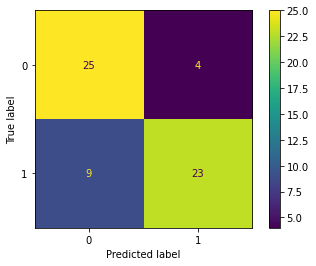

In [ ]:
"""### 1. Decision Tree"""

mod_1=DecisionTreeClassifier(random_state=0)
mod_1.fit(train_X,train_Y)
prediction=mod_1.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))

plot_confusion_matrix(mod_1,test_X,test_Y)
plt.grid(False)
plt.show()

The accuracy of the Logistic Regression is 0.8524590163934426


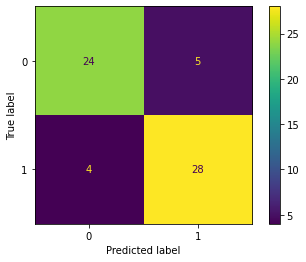

In [ ]:

"""###2. Logistic Regression."""

model_2 = LogisticRegression(random_state=0)
model_2.fit(train_X,train_Y)
prediction=model_2.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

plot_confusion_matrix(model_2,test_X,test_Y)
plt.grid(False)
plt.show()

The accuracy of the model on validation set is 0.8688524590163934


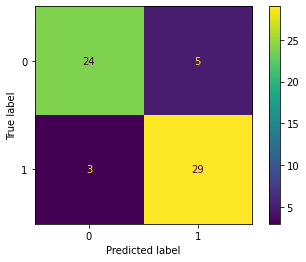

In [ ]:

"""###3. Multi Layer Perceptron"""

mod_3=MLPClassifier(alpha=1, max_iter=500,random_state=0).fit(train_X,train_Y)
y_pre = mod_3.predict(test_X)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_pre,test_Y))

plot_confusion_matrix(mod_3,test_X,test_Y)
plt.grid(False)
plt.show()

Accuracy for SVM kernel= rbf is 0.7049180327868853
Accuracy for SVM kernel= linear is 0.8524590163934426


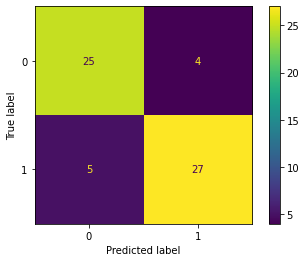

In [ ]:
"""### 4. SVM"""

types=['rbf','linear']
for i in types:
    mod_4=svm.SVC(kernel=i)
    mod_4.fit(train_X,train_Y)
    prediction=mod_4.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

plot_confusion_matrix(mod_4,test_X,test_Y)
plt.grid(False)
plt.show()

The accuracy of the model on validation set is 0.8524590163934426


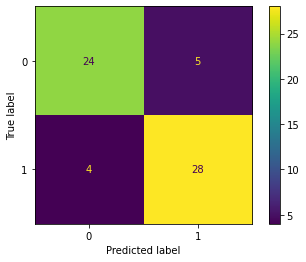

In [ ]:
"""### 5. Adaboost Algorithm"""

mod_5 = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 100, random_state= 0)
mod_5.fit(train_X, train_Y)
y_pred= mod_5.predict(test_X)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_pred,test_Y))

plot_confusion_matrix(mod_5,test_X,test_Y)
plt.grid(False)
plt.show()

The accuracy of the model on validation set is 0.8852459016393442


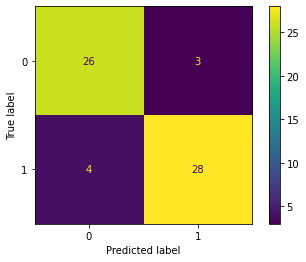

In [ ]:
"""###6. Random Forest   """

mod_6 = RandomForestClassifier(criterion= 'entropy', n_estimators= 300, random_state= 0)
mod_6.fit(train_X, train_Y)
y_pred = mod_6.predict(test_X)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_pred,test_Y))

plot_confusion_matrix(mod_6,test_X,test_Y)
plt.grid(False)
plt.show()

In [ ]:
"""###7. K-means Clustering"""

from sklearn.cluster import KMeans
mod_7 = KMeans(n_clusters=1, random_state=0).fit(train_X)
y_mean = mod_7.predict(test_X)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_mean,test_Y))

print(confusion_matrix(test_Y,y_mean))


The accuracy of the model on validation set is 0.47540983606557374
[[29  0]
 [32  0]]


In [ ]:
"""### 8. PCA """

pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(train_X)

X_pca


array([[ 4.75748660e+01, -1.57886970e+01],
       [ 3.11788209e+01,  1.00162885e+01],
       [ 8.05341913e+00, -1.14251810e+01],
       [ 4.15860728e+00, -1.01986630e+01],
       [ 8.95087227e+01, -4.53258621e+00],
       [ 5.65988419e+01, -8.77354827e+00],
       [ 4.17718119e+01, -8.77466279e+00],
       [ 4.82013513e+01, -1.29923523e+00],
       [-7.09489380e+01,  2.47197164e+01],
       [-4.99733728e+01, -2.45153224e+01],
       [-1.96150718e+01, -2.84457131e+01],
       [-1.59501306e+01, -3.61265351e+01],
       [-2.43030131e+01, -3.79055707e+01],
       [ 2.76148690e+01,  6.37322382e+01],
       [ 1.56737208e+01, -5.14688879e+00],
       [-1.24566933e+01, -9.86253137e+00],
       [-2.87418462e+01,  1.52005001e+01],
       [ 1.90874432e+01,  4.89993005e+01],
       [-2.66303570e+01,  5.18971803e+00],
       [ 4.09280354e+01,  4.75306835e+01],
       [ 2.72234800e+01, -1.79722827e+01],
       [ 1.56644103e+01,  2.00959731e+01],
       [-2.65036509e+01,  9.21172169e-01],
       [-3.

###10. Comparison of Machine Learning Algorithms

In [ ]:
lists=['Linear Svm','Radial Svm','Logistic Regression','Decision Tree','MLP','Random Forest','Adaboost','K-means']
models=[
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf'),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(random_state=0),
    MLPClassifier(alpha=1, max_iter=500,random_state=0),
    RandomForestClassifier(criterion= 'entropy', n_estimators= 300, random_state= 0),
    AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 100, random_state= 0),
    KMeans(n_clusters=1, random_state=0)]

In [ ]:
predicted =[]

In [ ]:
X = scaled_df.drop('output', axis = 1)
y = scaled_df['output']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
for i in models:
    model = i
    model.fit(X_train,train_Y)
    prediction=model.predict(test_X)
    predicted.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(predicted,index=lists)
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.524590
Radial Svm,0.524590
Logistic Regression,0.557377
Decision Tree,0.688525
MLP,0.590164
Random Forest,0.721311
Adaboost,0.737705
K-means,0.475410
